# 1.Data Pre-Processing

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [44]:
dataset = pd.read_csv("data(3).csv")

In [45]:
dataset.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'anomaly'],
      dtype='object')

In [46]:
dataset.dtypes

time                         object
Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
anomaly                       int64
dtype: object

In [47]:
dataset.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly
0,01-01-2017 00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1
1,01-01-2017 00:05,879.23,918.14,-184.33,-182.10,862.53,-149.76,1
2,01-01-2017 00:10,875.67,924.18,-181.26,-166.47,866.06,-145.01,1
3,01-01-2017 00:15,875.28,923.15,-179.15,-174.83,865.85,-142.82,1
4,01-01-2017 00:20,891.66,934.26,-178.32,-173.72,876.06,-143.39,1


In [48]:
dataset.duplicated().sum()

0

#### Changing Column Type from Object to Numeric

In [49]:
columns_to_scale = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft', 'Cyclone_Inlet_Draft', 'Cyclone_Material_Temp']
dataset[columns_to_scale] = dataset[columns_to_scale].apply(pd.to_numeric, errors='coerce')

In [50]:
print(dataset[columns_to_scale].dtypes)


Cyclone_Inlet_Gas_Temp      float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Inlet_Draft         float64
Cyclone_Material_Temp       float64
dtype: object


#### Finding Null Values

In [51]:
dataset.isnull().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
anomaly                        0
dtype: int64

#### Handling Missing Values Using KNN Imputer

In [52]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(dataset[columns_to_scale])


#### MinMaxScaler for Feature Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(imputed_data)


# 2. Machine Learning- (Isolation Forest)

In [54]:
from sklearn.ensemble import IsolationForest

In [55]:
clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(scaled_data)
prediction=clf.predict(scaled_data)

In [56]:
print(prediction)

[1 1 1 ... 1 1 1]


In [62]:
anomaly_count = dataset['anomaly'].value_counts()

In [63]:
dataset['anomalies'] = anomaly
dataset.to_csv('datame.csv', index=False)

In [64]:
print(anomaly_count)

anomaly
 1    323998
-1     53721
Name: count, dtype: int64


#### Finding Faulty Data

In [65]:
contains_fault = dataset[dataset['anomaly'] == -1]

#### Creating A CSV File containing The Faulty Data

In [66]:
print(contains_fault)

                    time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
930     01-04-2017 05:30                  800.05                 844.06   
931     01-04-2017 05:35                  909.47                 897.36   
932     01-04-2017 05:40                  895.68                 935.48   
933     01-04-2017 05:45                  910.73                 900.23   
934     01-04-2017 05:50                  921.10                 908.25   
...                  ...                     ...                    ...   
375433   7/30/2020 13:50                  954.98                 997.39   
375434   7/30/2020 13:55                  934.50                 950.09   
375943  08-01-2020 08:20                  882.80                 877.47   
376344  08-02-2020 17:45                  984.83                1007.36   
377360  08-06-2020 06:25                  893.34                 903.65   

        Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
930               

In [67]:
contains_fault.to_csv('contains_fault.csv', index=False)

# Data Visualization

In [74]:
df = pd.read_csv('datame.csv')
columns_to_plot = ['Cyclone_Inlet_Gas_Temp','Cyclone_Gas_Outlet_Temp','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft','Cyclone_Material_Temp']

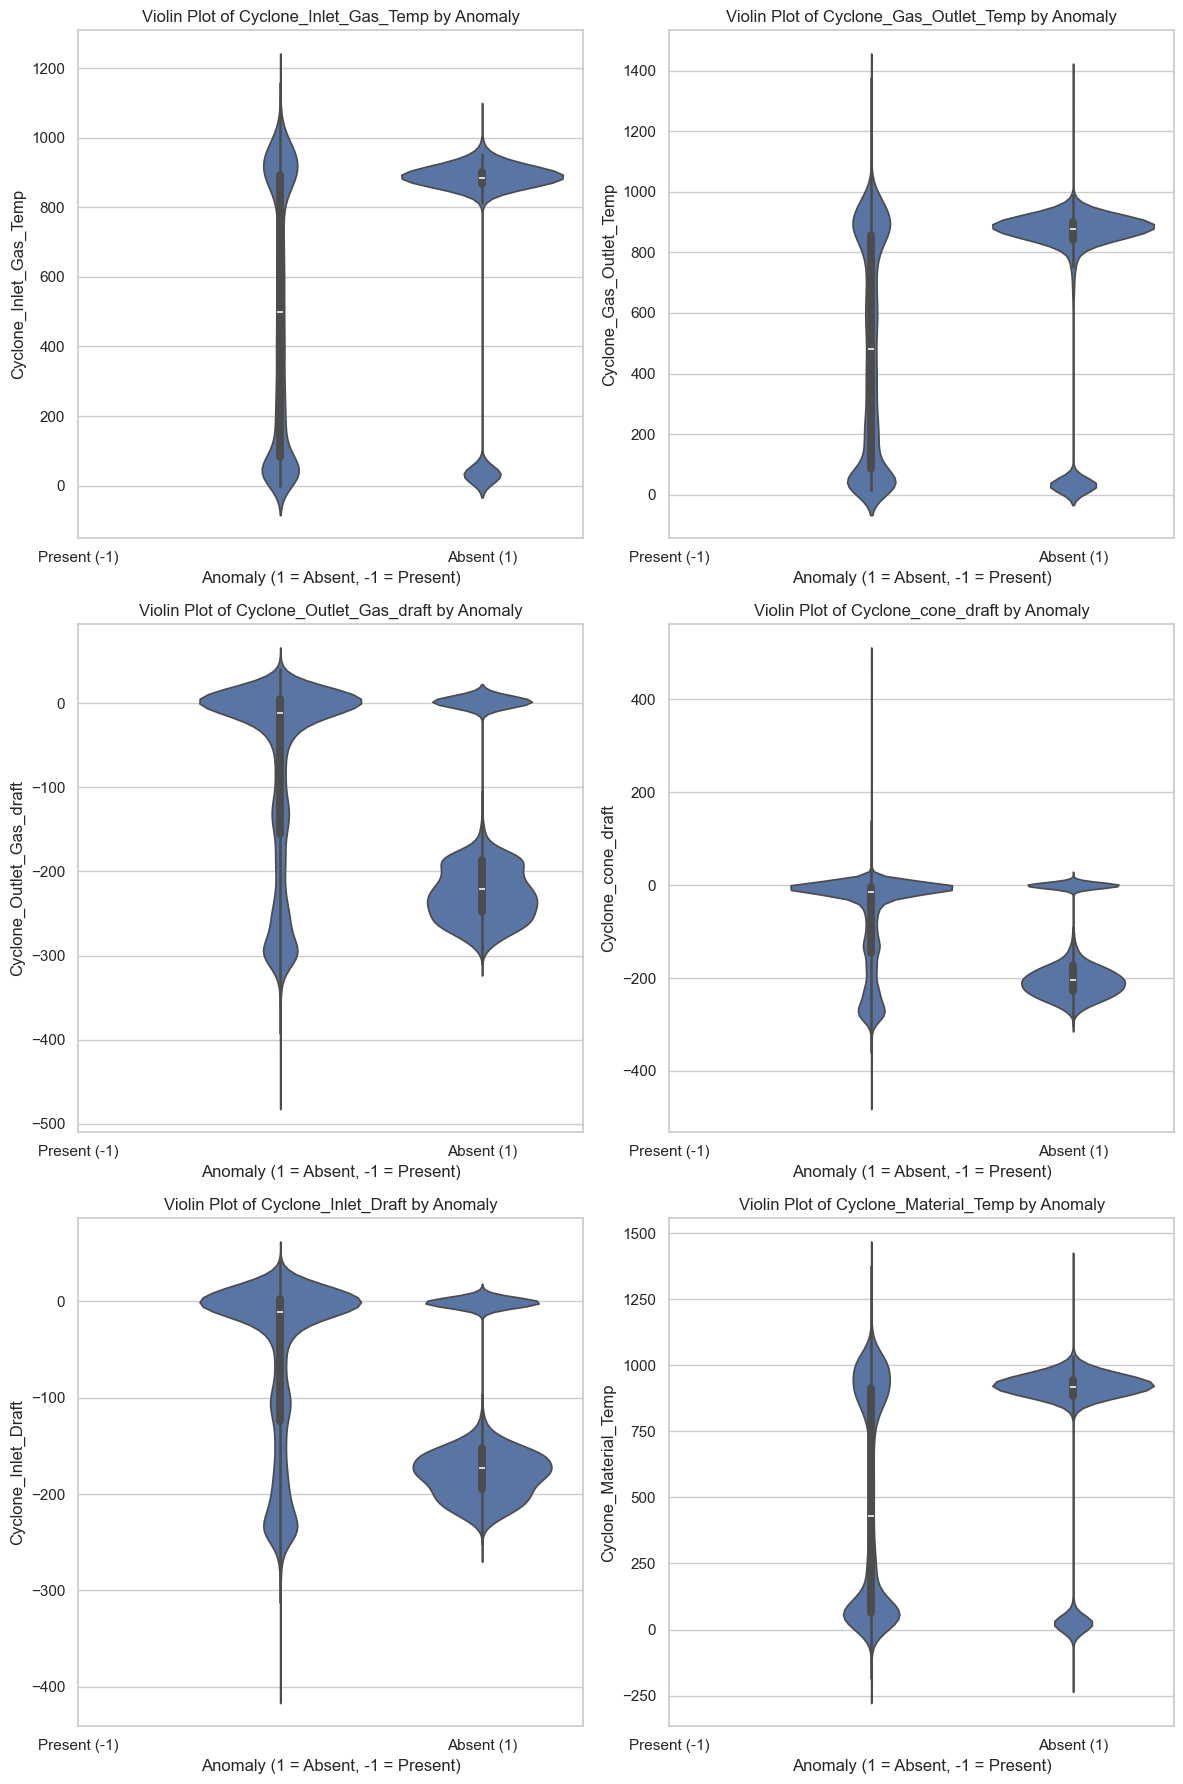

In [77]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
axes = axes.flatten()
for ax, col in zip(axes, columns_to_plot):
    sns.violinplot(x='anomaly', y=col, data=df, ax=ax)
    ax.set_title(f'Violin Plot of {col} by Anomaly')
    ax.set_xlabel('Anomaly (1 = Absent, -1 = Present)')
    ax.set_ylabel(col)
    ax.set_xticks([-1, 1])
    ax.set_xticklabels(['Present (-1)', 'Absent (1)'])
plt.tight_layout()
plt.show()